image

# Real Estate Modeling Project
**Author:** Kai Uechi

## Overview
This project uses linear regression to investigate how features of a home affect its price. Although the final model does not provide particularly accurate prediction, it shows that house condition and house grade have a large impact on price. By combining this insight with information on the cost of renovating, a real estate investment firm could identify the most profitable investment opportunities.

## Business Problem
A real estate investment firm needs to decide how best to utilize funds when improving existing properties. By analyzing the effect that various features and ammenities have on the price of a property, the firm can ensure it uses its resources efficiently. Using linear regression, I can model for inference to discover what factors increase price the most.

## Data Understanding
The dataset used contains information regarding house sales in King County. 
The columns included are as follows:

* `id` - Serves as a unique identifier for a given house
* `date` - The date the house was sold
* `price` - Sale price of house
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Total square footage of living space in the house
* `sqft_lot` - Total square footage of the lot
* `floors` - Number of floors in the house
* `waterfront` - If the house is or is not on a waterfront
* `view` - Category describing the quality of the view from a house
    * (Details as to which categories correspond to what sorts of landmarks/environments is unavailable)
* `condition` - Describes the maintenance condition of a house
    * Poor - Very worn out, likely requiring major reconstruction
    * Fair - Significantly worn, many items require overhauling
    * Average - All major components functioning, some minor repairs needed
    * Good - No obvious maintenance required, althrough not everything is new
    * Very Good - All items well maintained, recent overhaul/repair
* `grade` - Describes the construction and design quality of a house
    * Poor - This grade and below are properties below minimum standards
    * Low - Old, low quality construction. Does not meet code.
    * Fair - Small and simple, with low construction costs. Does not meet code.
    * Low Average - Lowest grade that meets building code, utilizing low quality materials
    * Average - Construction and design is standard
    * Good - Better materials used compared to average
    * Better - Extra exterior and interior design, better architectural design
    * Very Good - High quality features, tend to have larger square footage
    * Excellent - Custom design, higher quality finish work
    * Luxury - Superior build quality, all conveniences present
    * Mansion - Custom designed and built, very large with extrodinary finish work
* `sqft_above` - Square footage of the house, not including the basement 
* `sqft_basement` - Square footage of the basement, if present
* `yr_built` - Year house was constructed
* `yr_renovated` - Year of most recent renovation
* `zipcode` - Postal ZIP code
* `lat` - Latitude coordinate for the property
* `long` - Longitude coordinate for the property
* `sqft_living15` - Total square footage of living space for nearest 15 neighbors
* `sqft_lot15` - Total square footage of the lot for nearest 15 neighbors

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from itertools import permutations
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

#import data
data = pd.read_csv('data/kc_house_data.csv')
df = data.copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Text(0.5, 1.0, 'Price Distribution')

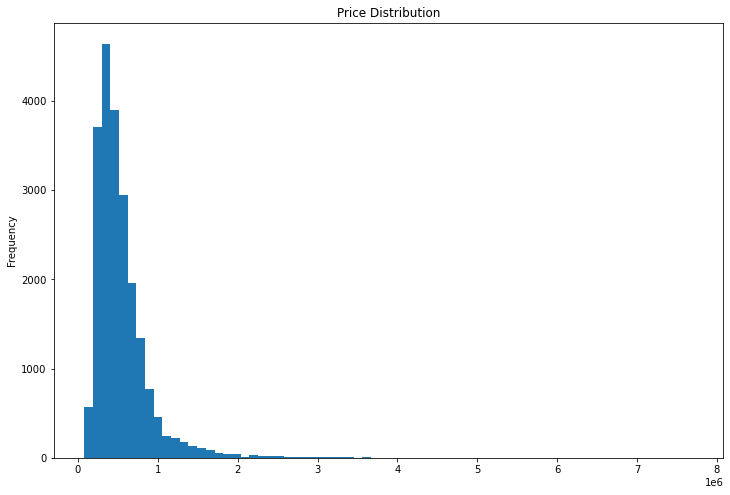

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax = df['price'].plot.hist(bins=70)
ax.set_title('Price Distribution')

<AxesSubplot:>

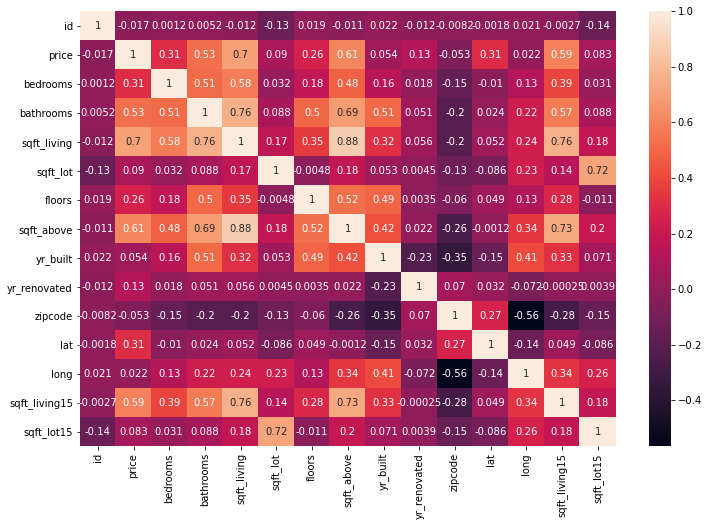

In [4]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

Text(0, 0.5, 'price')

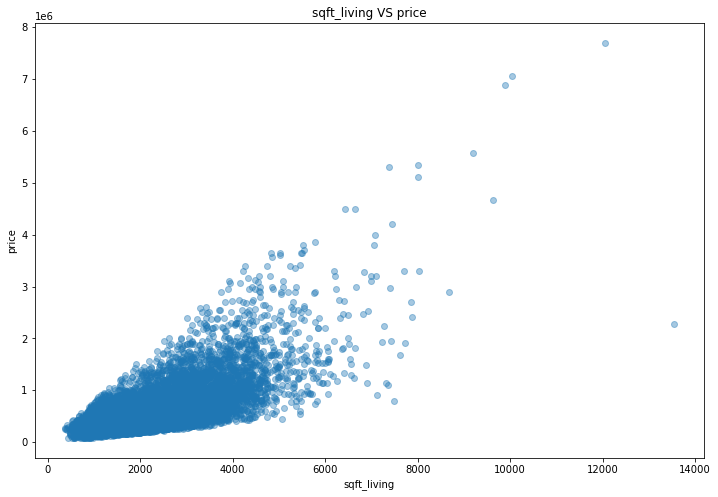

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['sqft_living'], y=df['price'], alpha=0.4, label='sqft_living')
ax.set_title('sqft_living VS price')
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

## Data Preparation
Data preparation steps are as follows:
* Drop unrelated/unusable columns
* Handle missing values
* Use one-hot encoding on categorical columns
    * Additional, alternative approach converting categories to number values using included data hierarchy
* Perform log scale on price to resolve data distribution

In [6]:
#mutual
#to_drop = data.loc[data.duplicated(['id'])].index
#df = data.drop(to_drop)
#df.duplicated(['id']).sum()
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Drop columns:** Remove columns that are unrelated to business problem or are unsuited for use.
* `yr_renovated` - Low correlation to `price`, significant number of missing values
* `zipcode`, `lat`, `long` - Since changing the physical location of a property is generally not a reasonable option, these columns are dropped 
* `id` - Unique identifier, has no bearing on `price`
* `date` - Time of sale, not related to renovating
* `waterfront`, `view` - Similar to `lat` and `long`, `waterfront` and `view` cannot be reasonably changed.

In [7]:
#drop columns
df = df.drop(['yr_renovated', 'id', 'date', 'zipcode', 
              'lat', 'long'], 
             axis=1)


df.drop(['waterfront', 'view'], axis=1, inplace=True)

**Handle missing values:** The columns that remain each have a small number of missing values, so the affected rows are dropped.

In [8]:
#handle missing values

to_drop = df.loc[df['sqft_basement'] == '?'].index
df = df.drop(to_drop)
df['sqft_basement'] = df['sqft_basement'].astype('float64')


df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#not a missing value, but only one row is rated '3 Poor' for grade column
#dropping this category due to lack of data
to_drop = df.loc[df['grade'] == '3 Poor'].index
df.drop(to_drop, inplace=True)
df['grade'].value_counts()

7 Average        8788
8 Good           5933
9 Better         2557
6 Low Average    1997
10 Very Good     1112
11 Excellent      391
5 Fair            235
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

**One-hot encoding:** Use OHE on categorical values to prepare for regression.

In [10]:
#create copy of dataframe to keep distinct from alternative approach
df_ohe = df.copy()

#get dummies for categorical
#waterfront_dummies = pd.get_dummies(df_ohe['waterfront'], prefix='waterfront', drop_first=True)
#view_dummies = pd.get_dummies(df_ohe['view'], prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(df_ohe['condition'], prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df_ohe['grade'], prefix='grade', drop_first=True)

#df_ohe.drop(['waterfront', 'view'], axis=1, inplace=True)
df_ohe.drop(['condition', 'grade'], axis=1, inplace=True)

#df_ohe = pd.concat([df_ohe, waterfront_dummies, view_dummies], axis=1)
df_ohe = pd.concat([df_ohe, condition_dummies, grade_dummies], axis=1)


x_ohe_processed = df_ohe.drop(['price'], axis=1)

df_ohe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,1340,5650,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1690,7639,0,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,2720,8062,0,0,0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,1360,5000,0,0,0,1,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,1800,7503,0,0,0,0,0,0,0,0,0,0,0,1,0


**Log scale target:** To resolve the non-normal distribution of price data seen earlier, the `price` column is log scaled.

Text(0.5, 1.0, 'Price Distribution')

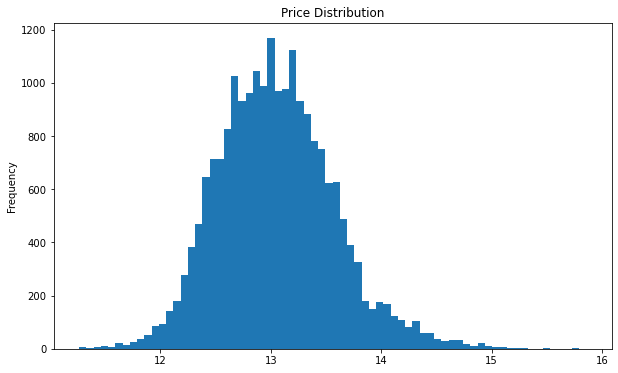

In [11]:
#create x, log y, check distribution after log
y_ohe_processed = np.log(df_ohe['price'])

fig, ax = plt.subplots(figsize=(10,6))
ax = y_ohe_processed.plot.hist(bins=70)
ax.set_title('Price Distribution')

**Alternative approach:** Since the categorical columns have a defined hierarchy, they can be converted to numbers directly. This is saved to the original dataframe (`df`) to keep data clean.

In [12]:
#convert to numeric
#df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
#df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1
#df['waterfront'] = df['waterfront'].astype('int64')
#df['waterfront'].value_counts()

In [13]:
#df.loc[df['view'] == 'NONE', 'view'] = 0
#df.loc[df['view'] == 'FAIR', 'view'] = 1
#df.loc[df['view'] == 'AVERAGE', 'view'] = 2
#df.loc[df['view'] == 'GOOD', 'view'] = 3
#df.loc[df['view'] == 'EXCELLENT', 'view'] = 4


#df['view'] = df['view'].astype('int64')
#df['view'].value_counts()

In [14]:
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1
df.loc[df['condition'] == 'Average', 'condition'] = 2
df.loc[df['condition'] == 'Good', 'condition'] = 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4
df['condition'] = df['condition'].astype('int64')
df['condition'].value_counts()

2    13726
3     5557
4     1665
1      166
0       28
Name: condition, dtype: int64

In [15]:
teststr = '10 Very Good  '

#create function to convert grade column
def filterNumeric(string):
    output = ''
    for ch in string:
        if ch.isdigit():
            output = output + ch
    return output

filterNumeric(teststr)

'10'

In [16]:
df['grade'] = df['grade'].map(filterNumeric)
df['grade'] = df['grade'].astype('int64')
df['grade'].value_counts()

7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
Name: grade, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

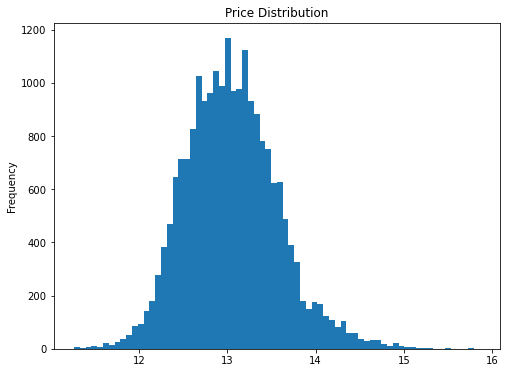

In [17]:
x_processed = df.drop(['price'], axis=1)

#log scale target
y_processed = np.log(df['price'])

fig, ax = plt.subplots(figsize=(8,6))
ax = y_processed.plot.hist(bins=70)
ax.set_title('Price Distribution')

## Modeling
Modeling steps are as follows:
* Create simple baseline model
* Create improved model
    * Compare effectiveness of preprocessing methods
* Solve multicollinearity
* Create final model

**Create baseline model:** The first model created is a simple baseline model, only using a single feature (`sqft_living`).

The resulting model's R-squared value isn't particularly high, but the qqplot shows the normality assumption is satisfied, and plotting the risiduals shows no significant signs of heteroscedasticity.
Multicollinearity isn't a factor, as there is only one feature used.

(!) Plotting the regression line shows a clear linear relationship between `sqft_living` and `price`.

In [18]:
X_sm = sm.add_constant(x_processed[['sqft_living']])
baseline_sm = sm.OLS(y_processed,X_sm)
results_baseline = baseline_sm.fit()

results_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.980e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        09:59:50   Log-Likelihood:                -9456.3
No. Observations:               21142   AIC:                         1.892e+04
Df Residuals:                   21140   BIC:                         1.893e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2187      0.006   1895.470      0.000      12.206      12.231
sqft_living     0.0004   2.83e-06    140.698      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.141   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.162
Skew:                           0.028   Prob(JB):                        0.206
Kurtosis:                       2.980   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_processed[['sqft_living']], y_processed)

baseline_sk = LinearRegression()
baseline_sk.fit(X_train, y_train)
print('Validation score: ', baseline_sk.score(X_test, y_test))


Validation score:  0.4695318926373626


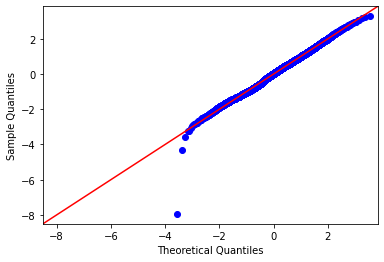

In [20]:
predictions = baseline_sk.predict(X_test)
residuals = y_test - predictions

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [21]:
#vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
#pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

#no VIF, since just one independent

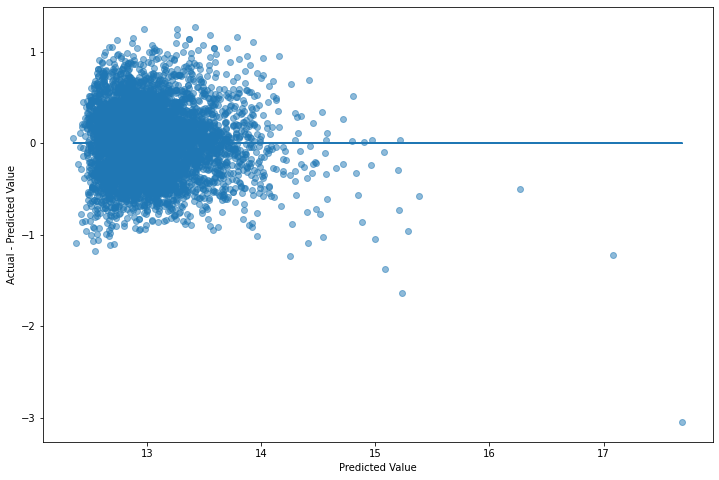

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(predictions, residuals, alpha=0.5)
ax.plot(predictions, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [23]:
#create function to check for normality, multicollinearity, and homoscedasticity
def checkAssumptions(model, trainX, testX, testY):
    predictions = model.predict(testX)
    residuals = testY - predictions
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    plt.show()
    
    vif = [variance_inflation_factor(trainX.values, i) for i in range(trainX.shape[1])]
    print(pd.Series(vif, index=trainX.columns, name="Variance Inflation Factor"))
    
    fig, ax = plt.subplots(figsize=(10,6))

    ax.scatter(predictions, residuals, alpha=0.5)
    ax.plot(predictions, [0 for i in range(len(testX))])
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("Actual - Predicted Value");
    ax.set_title('Check homoscedasticity')
    plt.show()

**Create improved model:** This second model uses all of the columns remaining after preprocessing, but has issues with high multicollinearity.

In [24]:
#ohe model goes here
X_sm = sm.add_constant(x_ohe_processed)
oheModel_sm = sm.OLS(y_ohe_processed,X_sm)

results_oheModel = oheModel_sm.fit()
results_oheModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1784.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        09:59:51   Log-Likelihood:                -5340.8
No. Observations:               21142   AIC:                         1.073e+04
Df Residuals:                   21119   BIC:                         1.091e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.7459      0.195    126.870      0.000      24.364      25.128
bedrooms               -0.0367      0.003    -12.172      0.000      -0.043      -0.031
bathrooms               0.0787      0.005     15.413      0.000       0.069       0.089
sqft_living             0.0001   3.62e-06     31.067      0.000       0.000       0.000
sqft_lot             2.658e-07   7.54e-08      3.523      0.000    1.18e-07    4.14e-07
floors                  0.1158      0.006     20.576      0.000       0.105       0.127
sqft_above             8.3e-06   3.54e-06      2.345      0.019    1.36e-06    1.52e-05
sqft_basement           0.0001   3.99e-06     26.077      0.000    9.63e-05       0.000
yr_built               -0.0061   9.96e-05    -61.014      0.000      -0.006      -0.006
sqft_living15           0.0001   5.25e-06     23.086      0.000       0.000       0.000
sqft_lot15          -5.041e-07   1.15e-07     -4.376      0.000    -7.3e-07   -2.78e-07
condition_Fair         -0.1798      0.025     -7.299      0.000      -0.228      -0.132
condition_Good          0.0180      0.005      3.369      0.001       0.008       0.028
condition_Poor         -0.1606      0.060     -2.699      0.007      -0.277      -0.044
condition_Very Good     0.0855      0.009      9.941      0.000       0.069       0.102
grade_11 Excellent      0.1304      0.019      6.974      0.000       0.094       0.167
grade_12 Luxury         0.2691      0.035      7.617      0.000       0.200       0.338
grade_13 Mansion        0.3207      0.089      3.619      0.000       0.147       0.494
grade_4 Low            -1.1877      0.062    -19.149      0.000      -1.309      -1.066
grade_5 Fair           -1.0716      0.025    -42.393      0.000      -1.121      -1.022
grade_6 Low Average    -0.8572      0.016    -53.910      0.000      -0.888      -0.826
grade_7 Average        -0.5957      0.013    -45.255      0.000      -0.622      -0.570
grade_8 Good           -0.3777      0.012    -31.785      0.000      -0.401      -0.354
grade_9 Better         -0.1585      0.012    -13.694      0.000      -0.181      -0.136
==============================================================================
Omnibus:                       78.070   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.576
Skew:                          -0.034   Prob(JB):                     3.23e-23
Kurtosis:                       3.336   Cond. No.                     8.43e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.56e-19. This might indicate that there are
strong multicollinearity problems or that the design matr

In [25]:

X_train, X_test, y_train, y_test = train_test_split(x_ohe_processed, y_ohe_processed)

oheModel_sk = LinearRegression()
oheModel_sk.fit(X_train, y_train)
print('Validation score: ', oheModel_sk.score(X_test, y_test))


Validation score:  0.6570535947586772


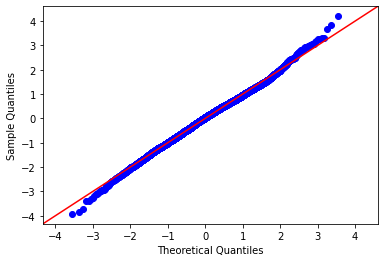

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


bedrooms               23.380771
bathrooms              26.248702
sqft_living                  inf
sqft_lot                2.491395
floors                 17.184436
sqft_above                   inf
sqft_basement                inf
yr_built               96.199642
sqft_living15          26.075882
sqft_lot15              2.713187
condition_Fair          1.037217
condition_Good          1.557259
condition_Poor          1.017306
condition_Very Good     1.185810
grade_11 Excellent      1.424521
grade_12 Luxury         1.151220
grade_13 Mansion        1.060906
grade_4 Low             1.066299
grade_5 Fair            1.524175
grade_6 Low Average     4.948083
grade_7 Average        15.133778
grade_8 Good            8.573052
grade_9 Better          3.537801
Name: Variance Inflation Factor, dtype: float64


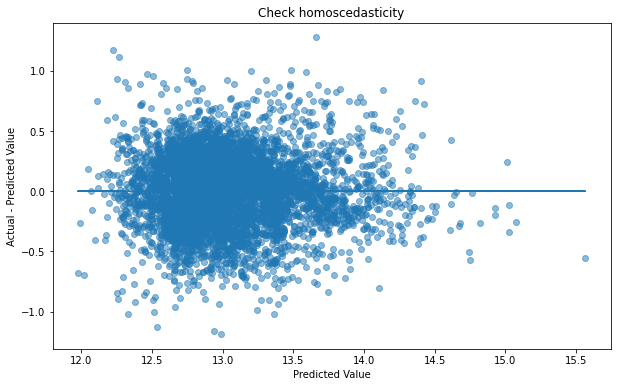

In [26]:
checkAssumptions(oheModel_sk, X_train, X_test, y_test)

**Compare preprocessing methods:** This model is similar to the one above, but uses the alternative numeric approach to handling categorical columns. Ultimately, this model performs slightly worse compared to the model using one-hot encoding, but both have issues with multicolinearity.

In [27]:
#alternative processing model
X_sm = sm.add_constant(x_processed)
intModel_sm = sm.OLS(y_processed,X_sm)
results_intModel = intModel_sm.fit()
results_intModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3515.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        09:59:53   Log-Likelihood:                -5445.0
No. Observations:               21142   AIC:                         1.091e+04
Df Residuals:                   21130   BIC:                         1.101e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.0302      0.189    116.346      0.000      21.659      22.401
bedrooms         -0.0301      0.003    -10.144      0.000      -0.036      -0.024
bathrooms         0.0818      0.005     16.060      0.000       0.072       0.092
sqft_living       0.0001   3.55e-06     29.238      0.000    9.68e-05       0.000
sqft_lot        2.44e-07   7.57e-08      3.222      0.001    9.56e-08    3.92e-07
floors            0.1259      0.006     22.683      0.000       0.115       0.137
condition         0.0418      0.004     11.574      0.000       0.035       0.049
grade             0.2125      0.003     64.540      0.000       0.206       0.219
sqft_above    -2.459e-06   3.42e-06     -0.719      0.472   -9.16e-06    4.24e-06
sqft_basement     0.0001      4e-06     26.583      0.000    9.84e-05       0.000
yr_built         -0.0058   9.78e-05    -59.410      0.000      -0.006      -0.006
sqft_living15     0.0001   5.22e-06     23.390      0.000       0.000       0.000
sqft_lot15    -5.076e-07   1.16e-07     -4.388      0.000   -7.34e-07   -2.81e-07
==============================================================================
Omnibus:                       75.647   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.535
Skew:                          -0.063   Prob(JB):                     2.96e-21
Kurtosis:                       3.302   Cond. No.                     8.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.57e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
#create scikit model
X_train, X_test, y_train, y_test = train_test_split(x_processed, y_processed)

intModel_sk = LinearRegression()
intModel_sk.fit(X_train, y_train)
print('Validation score: ', intModel_sk.score(X_test, y_test))


Validation score:  0.6378437977804341


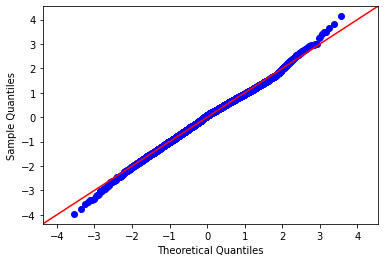

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


bedrooms          22.497547
bathrooms         25.096268
sqft_living             inf
sqft_lot           2.243202
floors            16.253873
condition         15.570180
grade            139.830177
sqft_above              inf
sqft_basement           inf
yr_built         108.827678
sqft_living15     26.089114
sqft_lot15         2.510250
Name: Variance Inflation Factor, dtype: float64


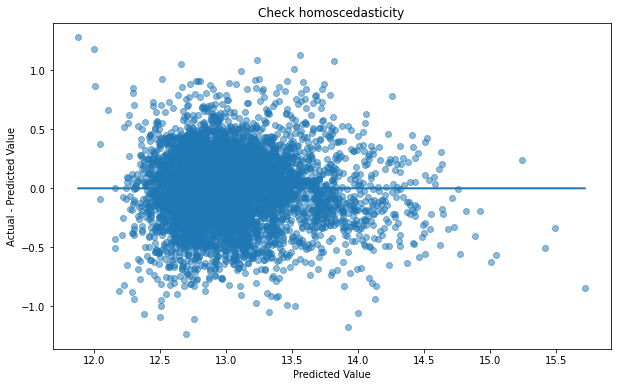

In [29]:
checkAssumptions(intModel_sk, X_train, X_test, y_test)

**Solve multicollinearity:** Both previous models have high multicollinearity, so the next task is to fix this. Since the model using OHE performed slightly better, that data is used going forward.

<AxesSubplot:>

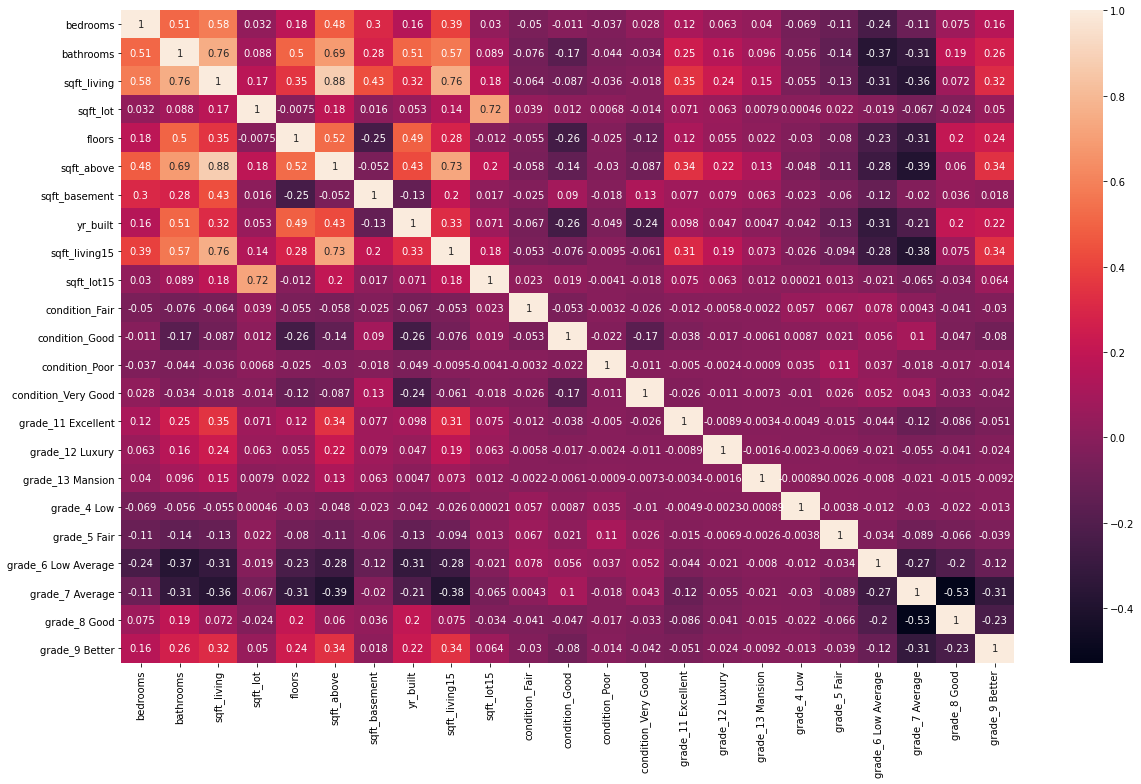

In [30]:
#multicoll problem, solve
ohe_corr = x_ohe_processed.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(ohe_corr, annot=True)

In [31]:

#after some testing, dropping the columns below resolves multicollinearity
#(condition_Poor and floors dropped for low significance, not multicoll)

x_final = x_ohe_processed.drop(['sqft_basement', 'sqft_above', 
                            'yr_built', 'condition_Poor',
                            'sqft_living15', 'sqft_lot15', 'floors'], 
                           axis=1)
#x_final.drop('view_NONE', inplace=True, axis=1)


x_final['bed/bath'] = x_final['bedrooms'] / x_final['bathrooms']
x_final.drop(['bedrooms', 'bathrooms'], axis=1, inplace=True)
x_final.head()

,sqft_living,sqft_lot,condition_Fair,condition_Good,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,bed/bath
0,1180,5650,0,0,0,0,0,0,0,0,0,1,0,0,3.000000
1,2570,7242,0,0,0,0,0,0,0,0,0,1,0,0,1.333333
2,770,10000,0,0,0,0,0,0,0,0,1,0,0,0,2.000000
3,1960,5000,0,0,1,0,0,0,0,0,0,1,0,0,1.333333
4,1680,8080,0,0,0,0,0,0,0,0,0,0,1,0,1.500000


In [32]:
vif = [variance_inflation_factor(x_final.values, i) for i in range(x_final.shape[1])]
pd.Series(vif, index=x_final.columns, name="Variance Inflation Factor")


sqft_living            6.207823
sqft_lot               1.178860
condition_Fair         1.033205
condition_Good         1.469435
condition_Very Good    1.144314
grade_11 Excellent     1.363861
grade_12 Luxury        1.128789
grade_13 Mansion       1.036311
grade_4 Low            1.013791
grade_5 Fair           1.132268
grade_6 Low Average    2.136878
grade_7 Average        4.792997
grade_8 Good           3.126485
grade_9 Better         2.193558
bed/bath               8.989562
Name: Variance Inflation Factor, dtype: float64

**Create final model:** The multicollinearity of the features has been resolved such that each feature has a VIF score below 10. This set of data is used for the final model.

The R-squared score of the final model is lower compared to the previous model, but the final model actually meets all required assumptions. All remaining features are significant to an alpha of 0.05

In [33]:
X_sm = sm.add_constant(x_final)
finalModel_sm = sm.OLS(y_processed, X_sm)
results_final = finalModel_sm.fit()

results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1885.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        10:00:01   Log-Likelihood:                -7463.3
No. Observations:               21142   AIC:                         1.496e+04
Df Residuals:                   21126   BIC:                         1.509e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.0586      0.019    698.657      0.000      13.022      13.095
sqft_living             0.0002   4.13e-06     51.045      0.000       0.000       0.000
sqft_lot            -1.704e-07   5.86e-08     -2.906      0.004   -2.85e-07   -5.55e-08
condition_Fair         -0.1143      0.027     -4.205      0.000      -0.168      -0.061
condition_Good          0.0890      0.006     15.885      0.000       0.078       0.100
condition_Very Good     0.2305      0.009     25.502      0.000       0.213       0.248
grade_11 Excellent      0.1492      0.021      7.252      0.000       0.109       0.190
grade_12 Luxury         0.3030      0.039      7.809      0.000       0.227       0.379
grade_13 Mansion        0.3956      0.098      4.057      0.000       0.204       0.587
grade_4 Low            -1.0329      0.068    -15.134      0.000      -1.167      -0.899
grade_5 Fair           -0.9629      0.027    -35.498      0.000      -1.016      -0.910
grade_6 Low Average    -0.7899      0.016    -47.976      0.000      -0.822      -0.758
grade_7 Average        -0.6012      0.014    -44.523      0.000      -0.628      -0.575
grade_8 Good           -0.3968      0.013    -31.622      0.000      -0.421      -0.372
grade_9 Better         -0.1812      0.013    -14.308      0.000      -0.206      -0.156
bed/bath               -0.0122      0.004     -3.048      0.002      -0.020      -0.004
==============================================================================
Omnibus:                       35.134   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.300
Skew:                           0.099   Prob(JB):                     2.16e-08
Kurtosis:                       2.972   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_final, y_processed, random_state=8492)
finalModel_sk = LinearRegression()
finalModel_sk.fit(X_train, y_train)
print('Validation score: ', finalModel_sk.score(X_test, y_test))

Validation score:  0.5736318330114032


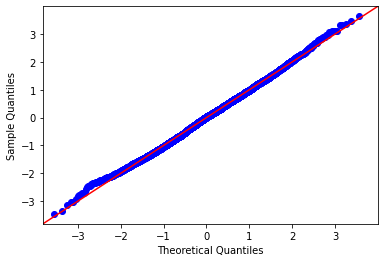

sqft_living           6.17698205
sqft_lot              1.17009696
condition_Fair        1.03622693
condition_Good        1.47267501
condition_Very Good   1.14256721
grade_11 Excellent    1.35272509
grade_12 Luxury       1.12422170
grade_13 Mansion      1.02174151
grade_4 Low           1.01335303
grade_5 Fair          1.13017920
grade_6 Low Average   2.17348367
grade_7 Average       4.82524840
grade_8 Good          3.11571925
grade_9 Better        2.22128184
bed/bath              9.24496967
Name: Variance Inflation Factor, dtype: float64


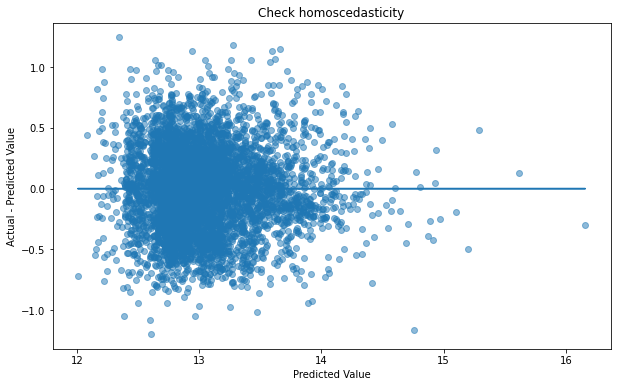

In [54]:
checkAssumptions(finalModel_sk, X_train, X_test, y_test)

In [55]:
#finalmodel r2 is lower, but actually meets the assumptions this time.
#all features significant

## Regression Results

* **R-squared** - The final model has an R-squared value of 0.57, meaning that 57% of the variance in price is explained by the model.
* **Mean Squared Error** - The mean squared error of the final model is 34.7, meaning an average error of 34.7% above or below the predicted value.
* **Coefficients** - The two features with the largest effect on price are `condition` and `grade`.
    * These coefficients represent percentage increase or decreases from the intercept, which equals 475,806.26\$
    
Due to the moderate R-squared value and significant mean squared error, the model is not particularly suited to prediction.

In [57]:
print('Validation score: ', finalModel_sk.score(X_test, y_test))
#final model r-squared is .57
#thus, 57% of the variance in price is explained by the model

Validation score:  0.5736318330114032


In [50]:
mean_squared_error(y_test, finalModel_sk.predict(X_test), squared=False)
#average error in terms of percent (+- 34.7% from prediction)

0.34741962065616944

In [59]:

coefSeries = pd.Series(data=finalModel_sk.coef_, index=x_final.columns)
pd.options.display.float_format = '{:.8f}'.format
coefSeries

sqft_living            0.00020813
sqft_lot              -0.00000014
condition_Fair        -0.11143617
condition_Good         0.08891307
condition_Very Good    0.23788998
grade_11 Excellent     0.14589696
grade_12 Luxury        0.33272742
grade_13 Mansion       0.50203212
grade_4 Low           -1.02155181
grade_5 Fair          -0.98852580
grade_6 Low Average   -0.79802900
grade_7 Average       -0.60399376
grade_8 Good          -0.40238780
grade_9 Better        -0.18422969
bed/bath              -0.01443657
dtype: float64

In [69]:
np.exp(finalModel_sk.intercept_)
#intercept shows base price is 475k~

475806.2646088331

### Impact of House Condition

Improving house condition affects the price significantly: a 8.9% increase from Average to Good, and 23.7% increase from Average to Very Good

In [65]:

def getOHECoeff(select):
    selResult = []
    for col in x_final.columns:
        if col.startswith(select):
            selResult.append(col)

    for col in selResult:
        print(col, 'affect on price: ', '{:.4f}'.format(coefSeries[col]*100), '%')
        
getOHECoeff('condition')

condition_Fair affect on price:  -11.1436 %
condition_Good affect on price:  8.8913 %
condition_Very Good affect on price:  23.7890 %


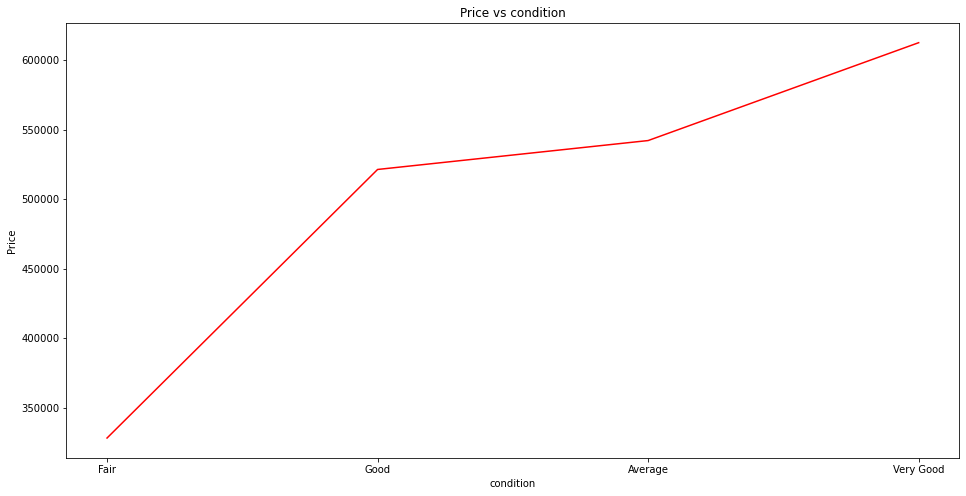

In [66]:
def groupbyPlot(gp_df, col, order):
    if order:
        gp_df['custOrder'] = pd.Categorical(gp_df[col], order)
        gp_df = gp_df.groupby('custOrder').mean()
        gp_df.sort_values('custOrder', inplace=True, axis=0)
    else:
        gp_df = gp_df.groupby(col).mean()
        gp_df.sort_values('price', inplace=True, axis=0)
    #print(gp_df.head())
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(gp_df.index, gp_df['price'], alpha=1, color='red')
    ax.set_title('Price vs ' + col)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    
    ax.set_xticks(gp_df.index)

groupbyPlot(data[data['condition'] != 'Poor'], 'condition', [])

### Impact of House Grade
Improving grade has a signficant impact on the price of a house: A grade rating of Very Good results in a 57.9% increase in price compared to Average.

In [67]:
getOHECoeff('grade')

grade_11 Excellent affect on price:  14.5897 %
grade_12 Luxury affect on price:  33.2727 %
grade_13 Mansion affect on price:  50.2032 %
grade_4 Low affect on price:  -102.1552 %
grade_5 Fair affect on price:  -98.8526 %
grade_6 Low Average affect on price:  -79.8029 %
grade_7 Average affect on price:  -60.3994 %
grade_8 Good affect on price:  -40.2388 %
grade_9 Better affect on price:  -18.4230 %


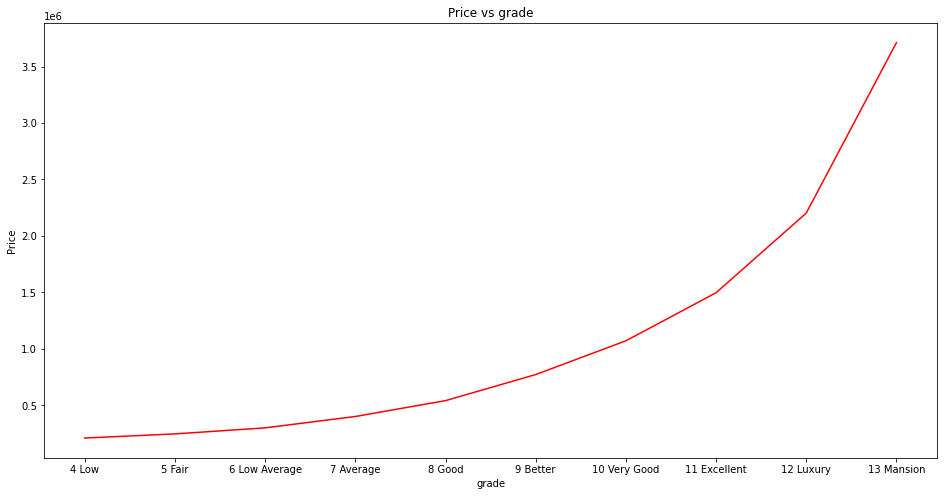

In [43]:
gradeOrder = ['4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good',
       '11 Excellent', '12 Luxury', '13 Mansion']
groupbyPlot(data[data['grade'] != '3 Poor'], 'grade', [])

### Impact of Bedrooms/Bathrooms
Having a larger number of bedrooms than bathrooms decreases price. By lowering the bedroom to bathroom ratio, price is increased.

In [68]:
coefSeries['bed/bath']

-0.014436570720132666

(0.0, 8.3)

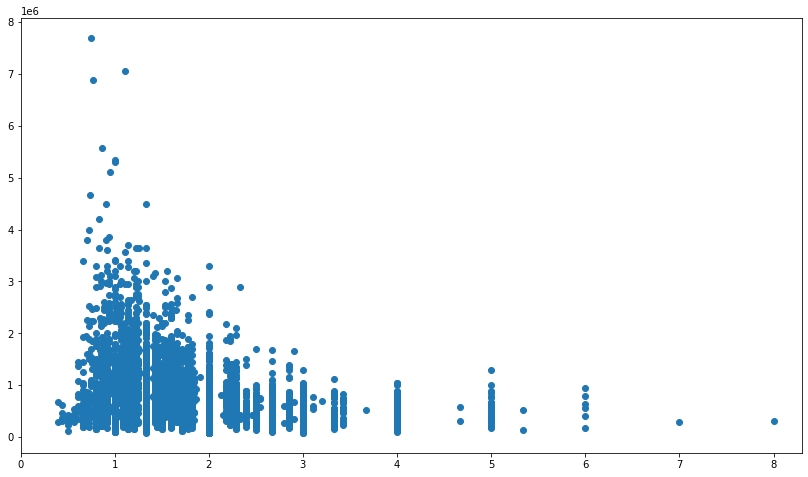

In [44]:
#how do i plot this
bedbathdf = data.copy()
bedbathdf['bed/bath'] = bedbathdf['bedrooms']/bedbathdf['bathrooms']
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(bedbathdf['bed/bath'], bedbathdf['price'])
plt.xlim([0,8.3])

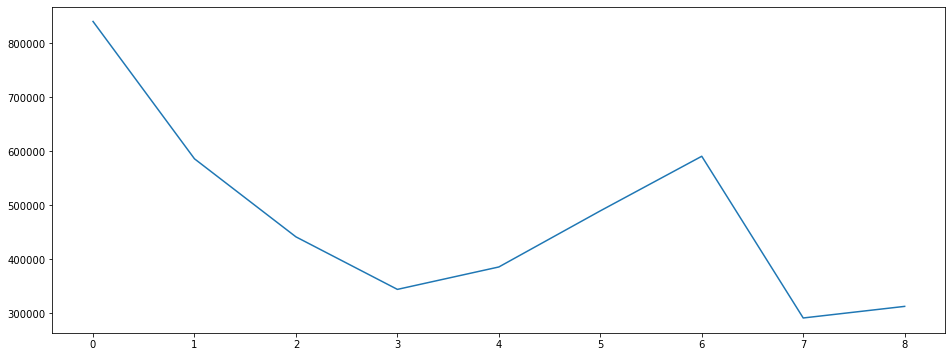

In [45]:
bedbathdf = bedbathdf.loc[bedbathdf['bedrooms'] != 33]
bedbathdf['bed/bath'] = np.floor(bedbathdf['bed/bath'])
bbGroup = bedbathdf.groupby('bed/bath').mean()

plt.subplots(figsize=(16,6))
plt.plot(bbGroup.index, bbGroup['price'])


## Conclusions
* Improving house condition through maintenance is a reliable way to increase the value of a home
* Renovating to improve house grade results in a larger increase, but reaching grade levels above Very Good might be unreasonable



### Next steps
* Additional data - More data will improve model accuracy.
    * Additional features - Given a dataset with more available features, it may be possible to gain additional insight into the effect of house features on house price.
* Understand cost - By comparing the effect of a feature on price to the cost of investment, it would be possible to determine what types of renovations are most profitable.